In [49]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [50]:
# importing the data
path = r"C:\Ashvin\AI ML\Data\household_power_consumption.txt"
df = pd.read_csv(path,sep=';')
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23748\216880822.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [84]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,month,is_weekend
0,0.374796,0.300719,0.376090,0.0,0.0125,0.548387,17,12,1
1,0.478363,0.313669,0.336995,0.0,0.0125,0.516129,17,12,1
2,0.479631,0.358273,0.326010,0.0,0.0250,0.548387,17,12,1
3,0.480898,0.361151,0.340549,0.0,0.0125,0.548387,17,12,1
4,0.325005,0.379856,0.403231,0.0,0.0125,0.548387,17,12,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [53]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [54]:
# Check missing values
df.isna().sum()


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [55]:
df.shape

(2075259, 9)

In [56]:
# Need to convert the string columns to **numeric** to identify the outliers, correlations and pattern in the data
# need to replace the missing value

col_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
                    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in col_to_convert:
    df[col] = pd.to_numeric(df[col],errors='coerce')
    

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [58]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [59]:
#replacing null values with median 
date_time_cols = df[['Date', 'Time']].copy()

df = df.drop(['Date', 'Time'], axis=1)
df.fillna(df.median(), inplace=True)

df = pd.concat([date_time_cols, df], axis=1)

In [60]:
# No null values
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

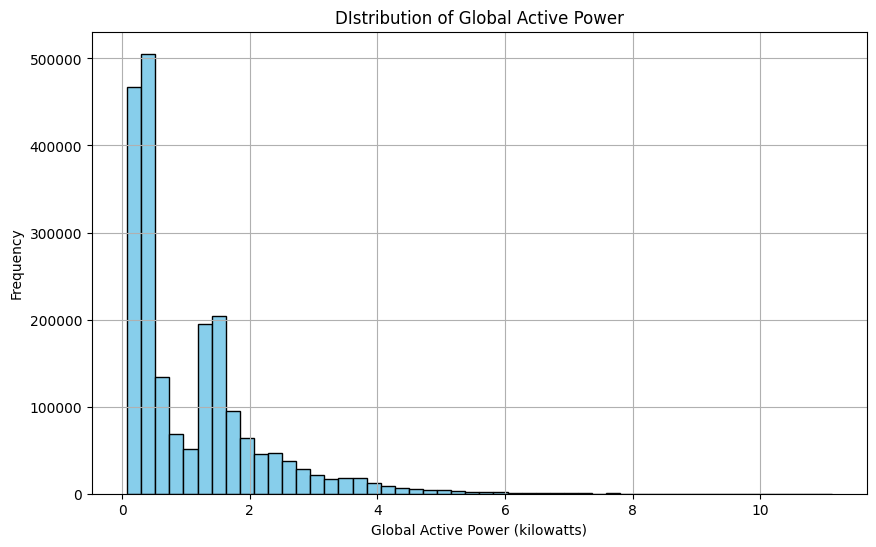

In [61]:
# Histogram is used to help identify the data distribution
plt.figure(figsize=(10,6))
df["Global_active_power"].hist(bins=50,color='skyblue',edgecolor='black')
plt.title('DIstribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the Above graph we can see that this  is Positive Skew(Right-Skewed) with majority of consumption 
occuring below 2kw. So the household use low power usage and only has high usage ocassionally due to high
energy appliance

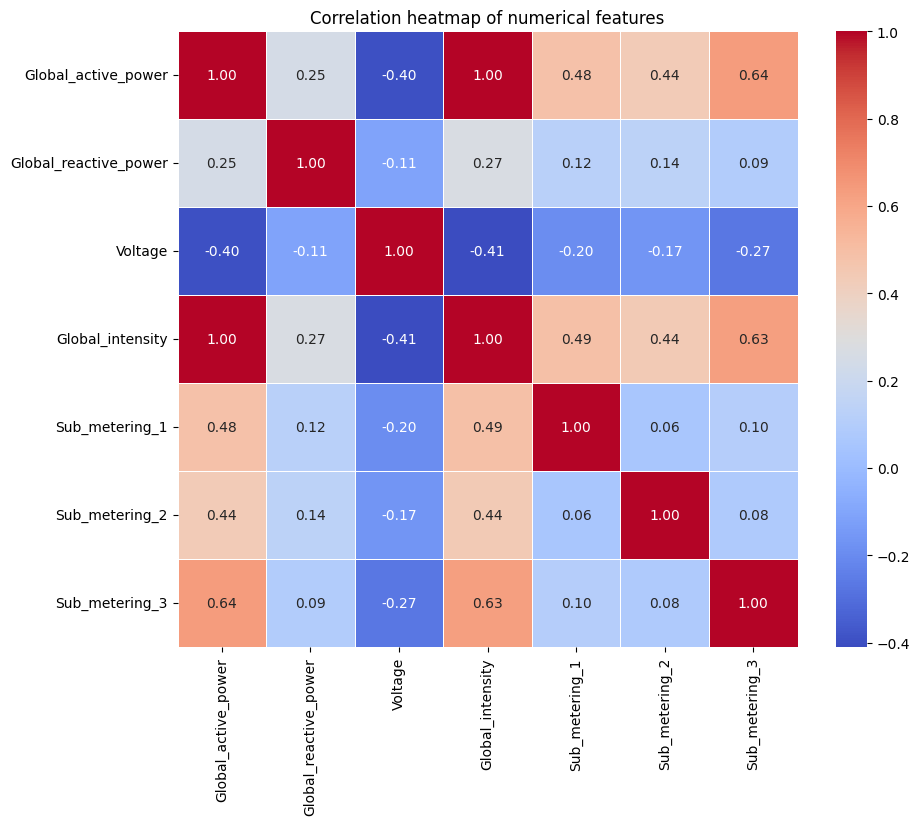

In [62]:
# Using correlation heatmap to identify how they are relate to each other
numeric_df = df.drop(columns = ['Date','Time'])

corr_df = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title("Correlation heatmap of numerical features")
plt.show()

In [63]:
corr_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247835,-0.399523,0.998891,0.484707,0.435142,0.639772
Global_reactive_power,0.247835,1.000000,-0.112351,0.266900,0.123531,0.139736,0.091057
Voltage,-0.399523,-0.112351,1.000000,-0.411121,-0.196051,-0.167496,-0.267892
Global_intensity,0.998891,0.266900,-0.411121,1.000000,0.489600,0.440909,0.627776
Sub_metering_1,0.484707,0.123531,-0.196051,0.489600,1.000000,0.055201,0.103755
Sub_metering_2,0.435142,0.139736,-0.167496,0.440909,0.055201,1.000000,0.082437
Sub_metering_3,0.639772,0.091057,-0.267892,0.627776,0.103755,0.082437,1.000000


From the correlation heatmap we can identify that the Global_active_power is most strongly correlated with
Sub_metering_3, indicating high energy usage from electric water heaters or air conditioners. Global_intensity 
shows the perfect correlation because it is directly derived from Global_active_power. Voltage has slight negative
correlation, suggesting an inverse relation with power

***Also Global Intensity has a very correlation with Global Active power so it needs to be dropped***

In [65]:
df.drop(['Global_intensity'],axis=1,inplace=True)

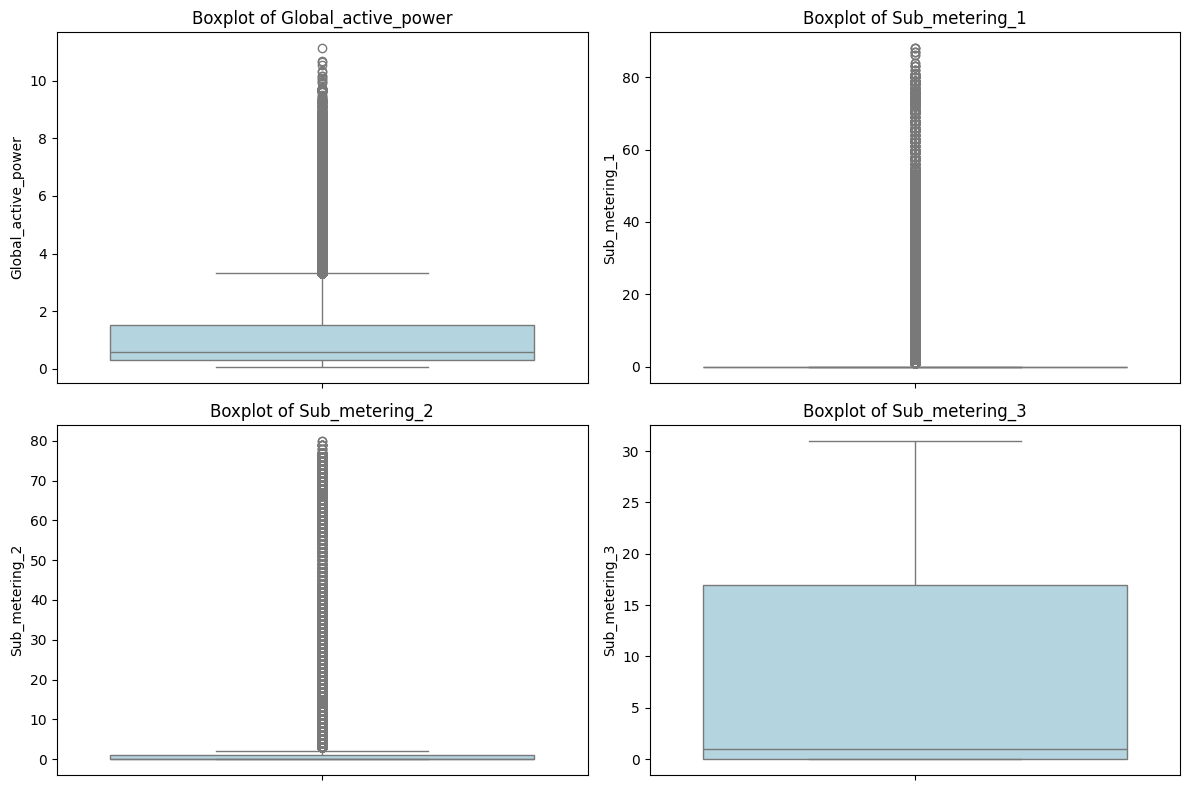

In [ ]:
# Plot To detect outliers
cols_to_plot = ['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3']
plt.figure(figsize=(12,8))
for i,col in enumerate(cols_to_plot,1):#to start the plot from index 1
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
#Z-score to identify outliers in data
from scipy import stats
import numpy as np
numeric_cols = ['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1',
                'Sub_metering_2','Sub_metering_3']
z_score = np.abs(stats.zscore(df[numeric_cols]))
print(z_score)

         Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
0                   2.975591               2.629139  1.864146        0.181154   
1                   4.062977               2.789788  2.239958        0.181154   
2                   4.076284               3.343136  2.345558        0.181154   
3                   4.089591               3.378836  2.205793        0.181154   
4                   2.452810               3.610885  1.603252        0.181154   
...                      ...                    ...       ...             ...   
2075254             0.132583               1.101498  0.127959        0.181154   
2075255             0.134484               1.101498  0.261511        0.181154   
2075256             0.140187               1.101498  0.317417        0.181154   
2075257             0.143989               1.101498  0.354688        0.181154   
2075258             0.145890               1.101498  0.401276        0.181154   

         Sub_metering_2  Su

In [68]:
#removing outliers
outlier_threshold = 3

outlier_values = np.where(z_score > outlier_threshold)[0]
without_outliers = df[numeric_cols].drop(outlier_values)
print("Original DataFrame Shape:", df[numeric_cols].shape)
print("DataFrame shape without outliers:", without_outliers.shape)

Original DataFrame Shape: (2075259, 6)
DataFrame shape without outliers: (1938507, 6)


In [ ]:
# Parsing date and time
# converting date and time to numeric and storing as single column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],format = '%d/%m/%Y %H:%M:%S')
df.set_index('datetime',inplace=True)
df.drop(['Date','Time'],axis=1,inplace=True)

#extracting time based features 
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x:1 if x>=5 else 0)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Sub_metering_1         float64
 4   Sub_metering_2         float64
 5   Sub_metering_3         float64
 6   hour                   int32  
 7   day                    int32  
 8   month                  int32  
 9   year                   int32  
 10  day_of_week            int32  
 11  is_weekend             int64  
dtypes: float64(6), int32(5), int64(1)
memory usage: 166.2 MB


Creating additional features - Daily Averages, Peak Hours, Rolling Average



1. Daily Average Power

In [71]:

daily_avg_power = df['Global_active_power'].resample('D').mean()  #using resample to group the time series based on Day

# Create a new column with only the date part (no hour/minute) because the map function without this returning the values as NaN
df['date_only'] = df.index.floor('D')

# Map the daily average back to each row using the date
df['daily_avg_power'] = df['date_only'].map(daily_avg_power)

df.drop(columns='date_only', inplace=True) #dropping the temporary column
df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,day_of_week,is_weekend,daily_avg_power
datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17,16,12,2006,5,1,3.053475
2006-12-16 17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,17,16,12,2006,5,1,3.053475
2006-12-16 17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,17,16,12,2006,5,1,3.053475
2006-12-16 17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,17,16,12,2006,5,1,3.053475
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17,16,12,2006,5,1,3.053475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,0.0,0.0,0.0,20,26,11,2010,4,0,1.178230
2010-11-26 20:59:00,0.944,0.000,240.00,0.0,0.0,0.0,20,26,11,2010,4,0,1.178230
2010-11-26 21:00:00,0.938,0.000,239.82,0.0,0.0,0.0,21,26,11,2010,4,0,1.178230


2. Peak Hours

In [72]:
df['is_peak_hour'] = (df['Global_active_power']>df['daily_avg_power']).astype(int)

3. Rolling Average

In [73]:
#used window = 60 as the date are in per minutes 
df['rolling_avg_power'] = df['Global_active_power'].rolling(window=60,min_periods=1).mean() 

Normalization

In [74]:
#normalizing the values(0 to 1)- it scales the values which are on different scales for better model performance 
from sklearn.preprocessing import MinMaxScaler
scale_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Sub_metering_1', 
                'Sub_metering_2', 'Sub_metering_3','daily_avg_power','rolling_avg_power']

scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

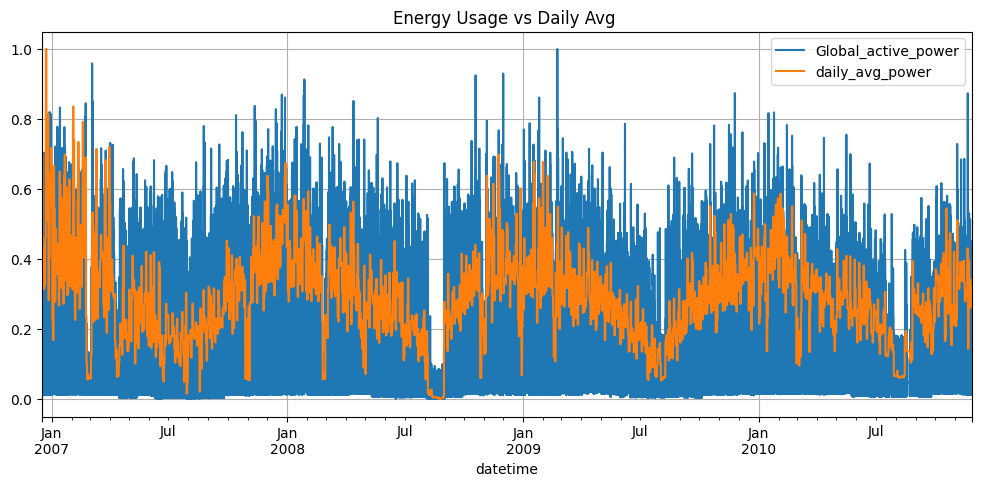

In [76]:
# Visualization to see trends
df[['Global_active_power', 'daily_avg_power']].plot(figsize=(12,5))
plt.title('Energy Usage vs Daily Avg ')
plt.grid(True)
plt.show()

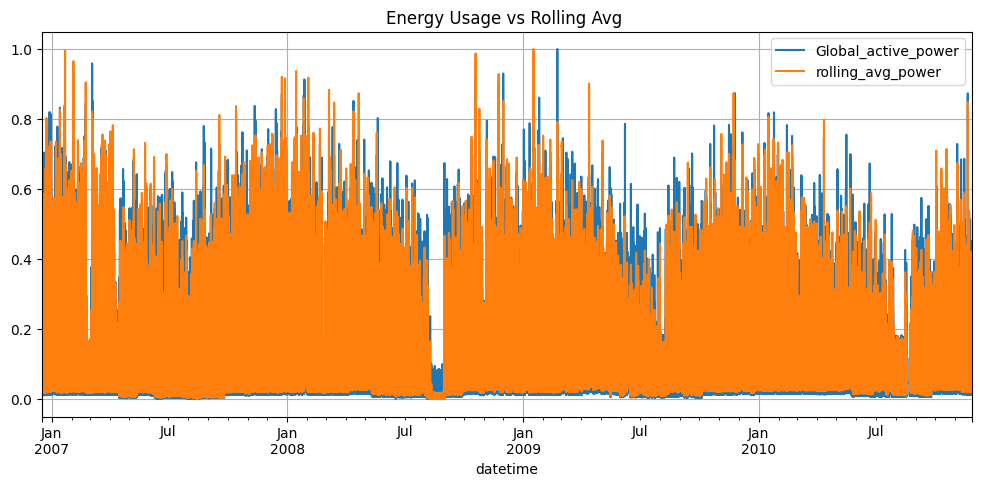

In [77]:
df[['Global_active_power', 'rolling_avg_power']].plot(figsize=(12,5))
plt.title('Energy Usage vs Rolling Avg ')
plt.grid(True)
plt.show()

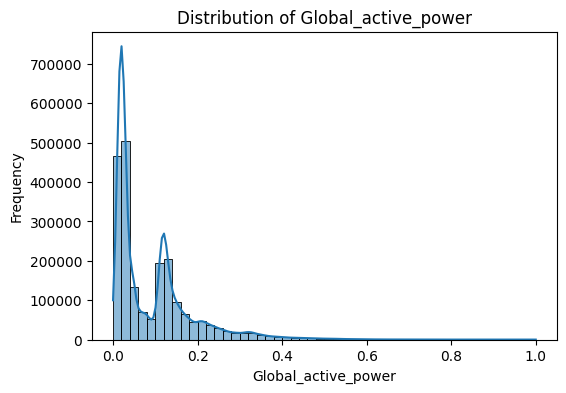

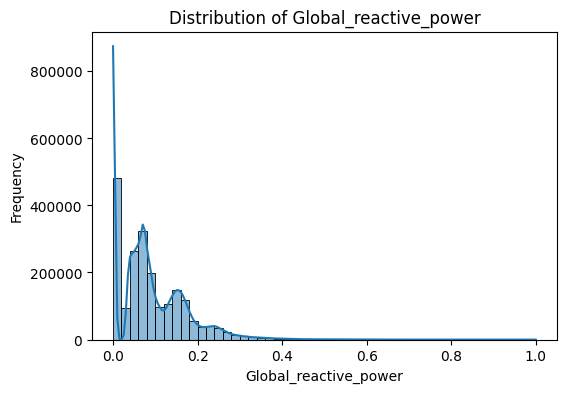

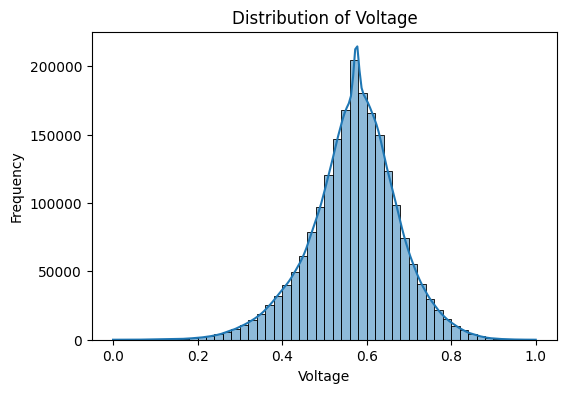

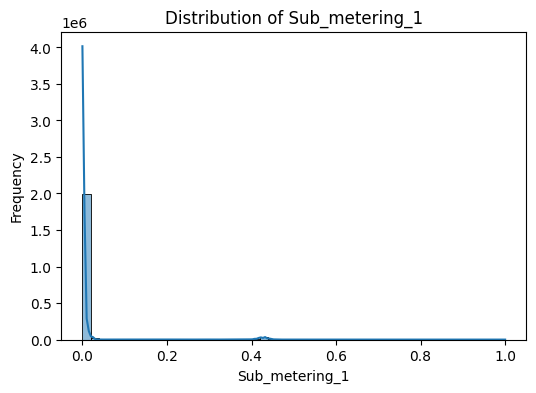

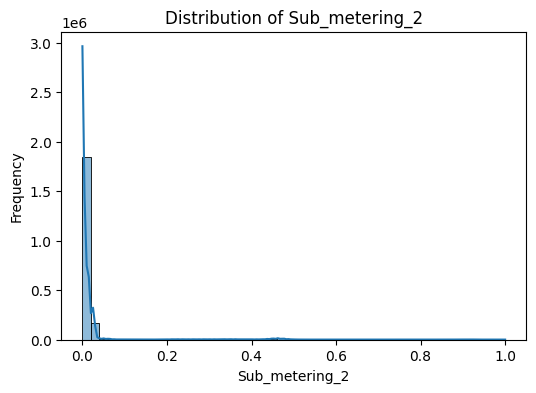

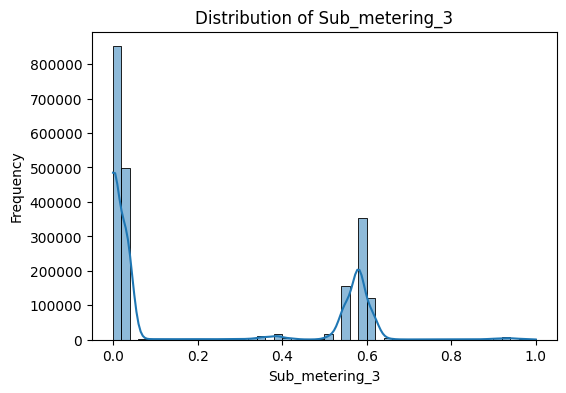

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [80]:
# Remove datetime index as it is no longer needed
df.reset_index(drop=True, inplace=True)

# Drop redundant columns 
df.drop(['day','day_of_week','year','daily_avg_power',
        'is_peak_hour','rolling_avg_power'], axis=1, inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,month,is_weekend
0,0.374796,0.300719,0.376090,0.0,0.0125,0.548387,17,12,1
1,0.478363,0.313669,0.336995,0.0,0.0125,0.516129,17,12,1
2,0.479631,0.358273,0.326010,0.0,0.0250,0.548387,17,12,1
3,0.480898,0.361151,0.340549,0.0,0.0125,0.548387,17,12,1
4,0.325005,0.379856,0.403231,0.0,0.0125,0.548387,17,12,1
...,...,...,...,...,...,...,...,...,...
2075254,0.078762,0.000000,0.556704,0.0,0.0000,0.000000,20,11,0
2075255,0.078580,0.000000,0.542811,0.0,0.0000,0.000000,20,11,0
2075256,0.078037,0.000000,0.536995,0.0,0.0000,0.000000,21,11,0
2075257,0.077675,0.000000,0.533118,0.0,0.0000,0.000000,21,11,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

# Dependant and Independant variables 
X = df.drop(['Global_active_power'],axis=1)
y = df['Global_active_power']

# Splitting the dataset into Train and Test 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

models = {
    'Linear Regression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(max_depth=10,random_state=30),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1,random_state=30),
    'MLPRegressor': MLPRegressor(hidden_layer_sizes=(50,),max_iter=300,random_state=30)
}

for name,model in models.items():
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"****{type(model).__name__}****")
    print(f"Train Root Mean Squared Error(RMSE): {np.sqrt(root_mean_squared_error(y_train,train_pred))}")
    print(f"Test Root Mean Squared Error(RMSE): {np.sqrt(root_mean_squared_error(y_test,test_pred))}")
    print(f"Train Mean Absolute Error(MAE): {mean_absolute_error(y_train,train_pred)}")
    print(f"Test Mean Absolute Error(MAE): {mean_absolute_error(y_test,test_pred)}")
    print(f"Train R-Squared Error(R2): {r2_score(y_train,train_pred)}")
    print(f"Test R-Squared Error(R2): {r2_score(y_test,test_pred)}")
    print("\n") 

****LinearRegression****
Train Root Mean Squared Error(RMSE): 0.217045748897669
Test Root Mean Squared Error(RMSE): 0.2168184644850149
Train Mean Absolute Error(MAE): 0.03171770183244017
Test Mean Absolute Error(MAE): 0.03167984497373724
Train R-Squared Error(R2): 0.7553499808947906
Test R-Squared Error(R2): 0.7564145497525249


****RandomForestRegressor****
Train Root Mean Squared Error(RMSE): 0.19543224742456197
Test Root Mean Squared Error(RMSE): 0.19586738056244316
Train Mean Absolute Error(MAE): 0.023661904304731574
Test Mean Absolute Error(MAE): 0.023742101931315443
Train R-Squared Error(R2): 0.8391855672895745
Test R-Squared Error(R2): 0.8377761338992931


****GradientBoostingRegressor****
Train Root Mean Squared Error(RMSE): 0.19553272498910274
Test Root Mean Squared Error(RMSE): 0.19539128014303708
Train Mean Absolute Error(MAE): 0.02374156394338464
Test Mean Absolute Error(MAE): 0.023703421601123965
Train R-Squared Error(R2): 0.8388545941123171
Test R-Squared Error(R2): 0.839

In [ ]:
# Gradient Boosting Regressor is the best performing model as (Train≈Test) - Performs consistely in train & test
# So we are choosing the GBR as our model

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23748\3200150136.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='viridis')


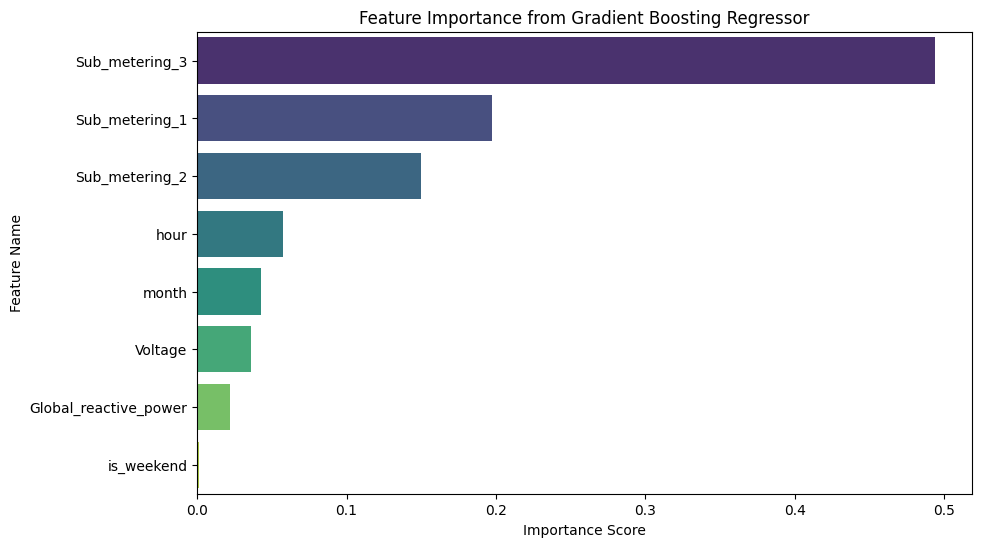

In [82]:
#Feature Importance Plot
import matplotlib.pyplot as plt
import seaborn as sns

gbr_model = models['GradientBoostingRegressor']
importances = gbr_model.feature_importances_

#creating df to store the values
feature_importance_df = pd.DataFrame({
    'Feature':X.columns,
    'Importance': importances
}).sort_values(by='Importance',ascending=False)

#plotting

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='viridis')
plt.title("Feature Importance from Gradient Boosting Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout
plt.show()


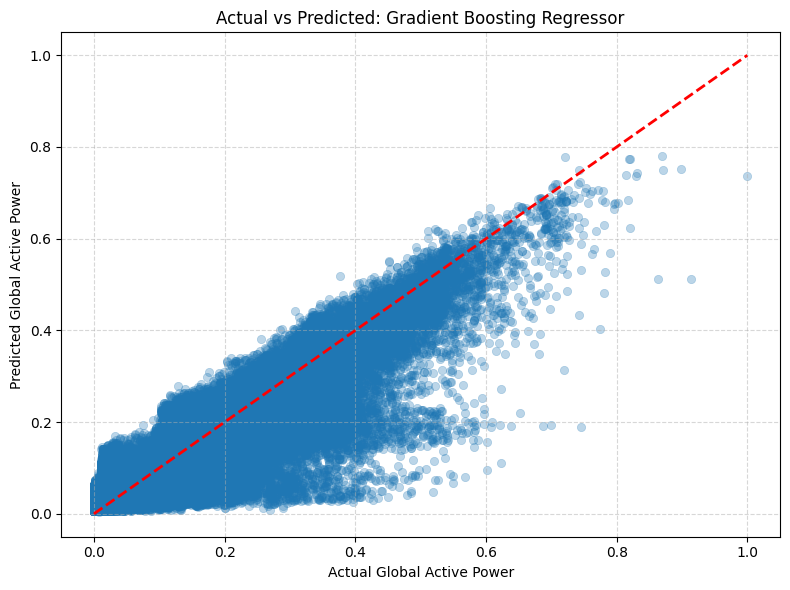

Gradient Boosting R2 Score: 0.8393


In [83]:
# Actual vs Predicted for Gradient Boosting Regressor
y_pred_grb = models['GradientBoostingRegressor'].predict(x_test)

#plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred_grb,alpha=0.3,edgecolor=None)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.title('Actual vs Predicted: Gradient Boosting Regressor')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print R2 score for reference
print(f"Gradient Boosting R2 Score: {r2_score(y_test, y_pred_grb):.4f}")